In [13]:
import os
# 设置proxy
os.environ['http_proxy'] = 'http://127.0.0.1:7890'
os.environ['https_proxy'] = 'http://127.0.0.1:7890'

In [ ]:
!export HTTP_PROXY= http://127.0.0.1:7890
!export HTTPS_PROXY= http://127.0.0.1:7890

Dataset: Sunspots
downloading data...
...done. Path = data/forecasting/Sunspots.csv


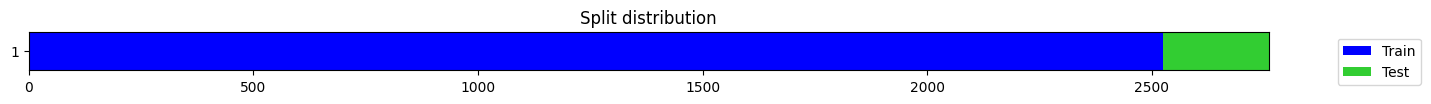

epoch,train_loss,valid_loss,mae,time
0,4218.858887,7960.512695,74.614235,00:00
1,4135.600586,7877.664551,74.158958,00:00
2,4127.336914,7719.423340,73.320030,00:00
3,4053.119385,7407.063477,71.683052,00:00
4,3937.302246,6779.442383,68.394386,00:00
5,3797.705566,5746.083496,63.089710,00:00
6,3570.876221,4312.233887,55.393696,00:00
7,3337.184570,3152.034668,47.580368,00:00
8,3065.174072,1506.756104,32.597237,00:00
9,2782.273926,2377.275146,40.544571,00:00


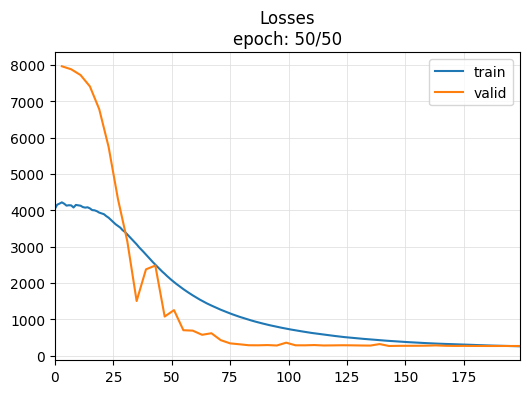

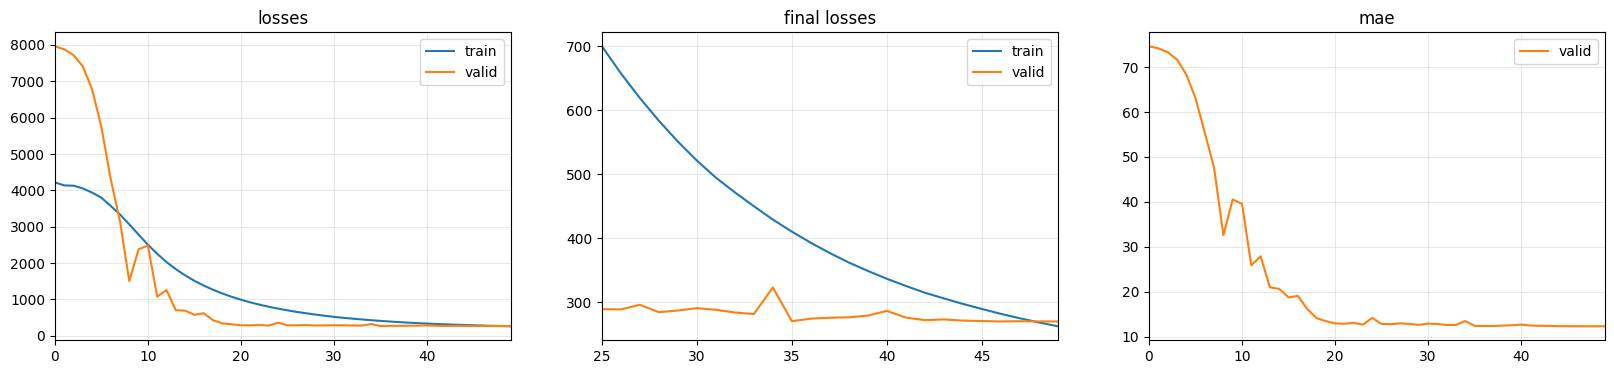

In [14]:
from tsai.basics import *

ts = get_forecasting_time_series("Sunspots").values
X, y = SlidingWindow(60, horizon=1)(ts)
splits = TimeSplitter(235)(y) 
tfms = [None, TSForecasting()]
batch_tfms = TSStandardize()
fcst = TSForecaster(X, y, splits=splits, path='models', tfms=tfms, batch_tfms=batch_tfms, bs=512, arch="TSTPlus", metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)
fcst.export("fcst.pkl")

In [16]:
from tsai.inference import load_learner

fcst = load_learner("models/fcst.pkl", cpu=False)
raw_preds, target, preds = fcst.get_X_preds(X[splits[1]], y[splits[1]])
raw_preds.shape
# torch.Size([235, 1])

torch.Size([235, 1])